In [2]:
### from molmap import loadmap
from joblib import load, dump
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, log_loss
import warnings, os
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from tqdm import tqdm
from glob import glob

from aggmap.show import imshow, imshow_wrap
from aggmap.utils.matrixopt import smartpadding

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [3]:
from aggmap import loadmap
from fmp1 import CalcFeatImp, CalcFeatImpEach

In [4]:
flist = glob('../data/*.csv.gzip')
flist = pd.Series(flist).sort_values().tolist()
fall = []
for i in flist:
    df1 = pd.read_csv(i, compression='gzip', index_col = 0)
    df1['class'] = i.split('/')[-1].split('.csv')[0]
    fall.append(df1)
    
df = pd.concat(fall, axis=0)
dfy = df[df.columns[-1:]]

In [5]:
Y = pd.get_dummies(dfy['class']).values

In [6]:
res_save_folder = './X-AI'

In [7]:
#agg
mp = loadmap('/raid/shenwanxiang/agg_mp_object/pan-cancer.mp')

data_save_folder = '/raid/shenwanxiang/transcriptome/pan-cancer'
X1 = load(os.path.join(data_save_folder, 'Agg1.data'))

#cluster split channel
X5 = load(os.path.join(data_save_folder, 'Agg5.data'))

In [8]:
fold = 0
fold_num = "fold_%s" % str(fold).zfill(2) 
X = X5
save_path = '../fold_results_c5/%s' % fold_num
model = tf.keras.models.load_model(os.path.join(save_path, 'model.h5'))

2021-04-13 12:49:24,402 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 12:49:24,578 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 2001.71it/s]


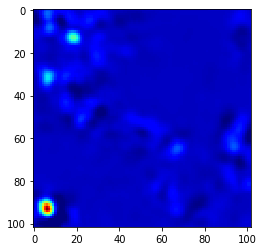

In [124]:
#for n, i, c in zip(image_idx, idx, clss):
i = 1
fontsize = 27
y = pd.DataFrame(Y, columns = range(Y.shape[-1]))
dfY = y.iloc[[i]]
arrX = X[[i]]
dfimp = CalcFeatImpEach(model, mp, arrX, dfY, apply_logrithm = False, apply_smoothing = True, sigma = 2, kernel_size=7)
IMPM = dfimp["imp"].values.reshape(mp._S.fmap_shape)
plt.imshow(IMPM, cmap = 'jet', vmin=-0.5)


# plot all class

ACC-13 13 01_ACC
2021-04-13 15:11:38,106 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:11:38,288 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1840.85it/s]


BLCA-240 240 02_BLCA
2021-04-13 15:11:59,156 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:11:59,322 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1853.81it/s]


BRCA-1687 1687 03_BRCA
2021-04-13 15:12:21,213 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:12:23,939 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1884.29it/s]


CESC-1843 1843 04_CESC
2021-04-13 15:12:45,145 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:12:45,343 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1892.74it/s]


CHOL-2032 2032 05_CHOL
2021-04-13 15:13:06,595 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:13:06,969 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1907.41it/s]


COAD-2166 2166 06_COAD
2021-04-13 15:13:27,509 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:13:27,885 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1836.58it/s]


DLBC-2428 2428 07_DLBC
2021-04-13 15:13:49,327 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:13:49,703 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1869.26it/s]


ESCA-2498 2498 08_ESCA
2021-04-13 15:14:11,274 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:14:11,671 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1866.97it/s]


GBM-2763 2763 09_GBM
2021-04-13 15:14:33,150 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:14:33,519 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1846.25it/s]


HNSC-3050 3050 10_HNSC
2021-04-13 15:14:55,515 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:14:55,909 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1906.87it/s]


KICH-3391 3391 11_KICH
2021-04-13 15:15:16,418 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:15:16,801 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1875.54it/s]


KIRC-4048 4048 12_KIRC
2021-04-13 15:15:38,604 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:15:38,988 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1843.28it/s]


KIRP-4342 4342 13_KIRP
2021-04-13 15:16:00,329 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:16:00,718 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1870.31it/s]


LAML-4522 4522 14_LAML
2021-04-13 15:16:22,428 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:16:22,800 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1911.34it/s]


LGG-4766 4766 15_LGG
2021-04-13 15:16:44,264 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:16:44,626 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1836.09it/s]


LIHC-5521 5521 16_LIHC
2021-04-13 15:17:05,794 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:17:06,177 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1858.26it/s]


LUAD-5810 5810 17_LUAD
2021-04-13 15:17:27,426 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:17:27,818 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1860.98it/s]


LUSC-6313 6313 18_LUSC
2021-04-13 15:17:49,319 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:17:49,715 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1902.76it/s]


MESO-6665 6665 19_MESO
2021-04-13 15:18:09,950 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:18:10,329 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1869.18it/s]


OV-6984 6984 20_OV
2021-04-13 15:18:31,676 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:18:32,059 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1847.55it/s]


PAAD-7148 7148 21_PAAD
2021-04-13 15:18:53,771 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:18:54,171 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1828.54it/s]


PCPG-7252 7252 22_PCPG
2021-04-13 15:19:15,746 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:19:16,140 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1865.11it/s]


PRAD-7458 7458 23_PRAD
2021-04-13 15:19:37,478 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:19:37,873 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1859.13it/s]


READ-7999 7999 24_READ
2021-04-13 15:19:59,523 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:19:59,905 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1886.72it/s]


SARC-8293 8293 25_SARC
2021-04-13 15:20:21,416 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:20:21,820 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1887.89it/s]


SKCM-8460 8460 26_SKCM
2021-04-13 15:20:43,502 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:20:43,921 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1911.20it/s]


STAD-8935 8935 27_STAD
2021-04-13 15:21:05,496 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:21:05,888 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1851.97it/s]


TGCT-9278 9278 28_TGCT
2021-04-13 15:21:27,086 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:21:27,517 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1878.43it/s]


THCA-9653 9653 29_THCA
2021-04-13 15:21:49,157 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:21:49,557 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1889.62it/s]


THYM-10038 10038 30_THYM
2021-04-13 15:22:10,932 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:22:11,889 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1856.86it/s]


UCEC-10235 10235 31_UCEC
2021-04-13 15:22:33,799 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:22:34,189 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1874.22it/s]


UCS-10355 10355 32_UCS
2021-04-13 15:22:55,282 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:22:55,697 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1845.53it/s]


UVM-10379 10379 33_UVM
2021-04-13 15:23:17,251 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 15:23:17,654 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1875.81it/s]


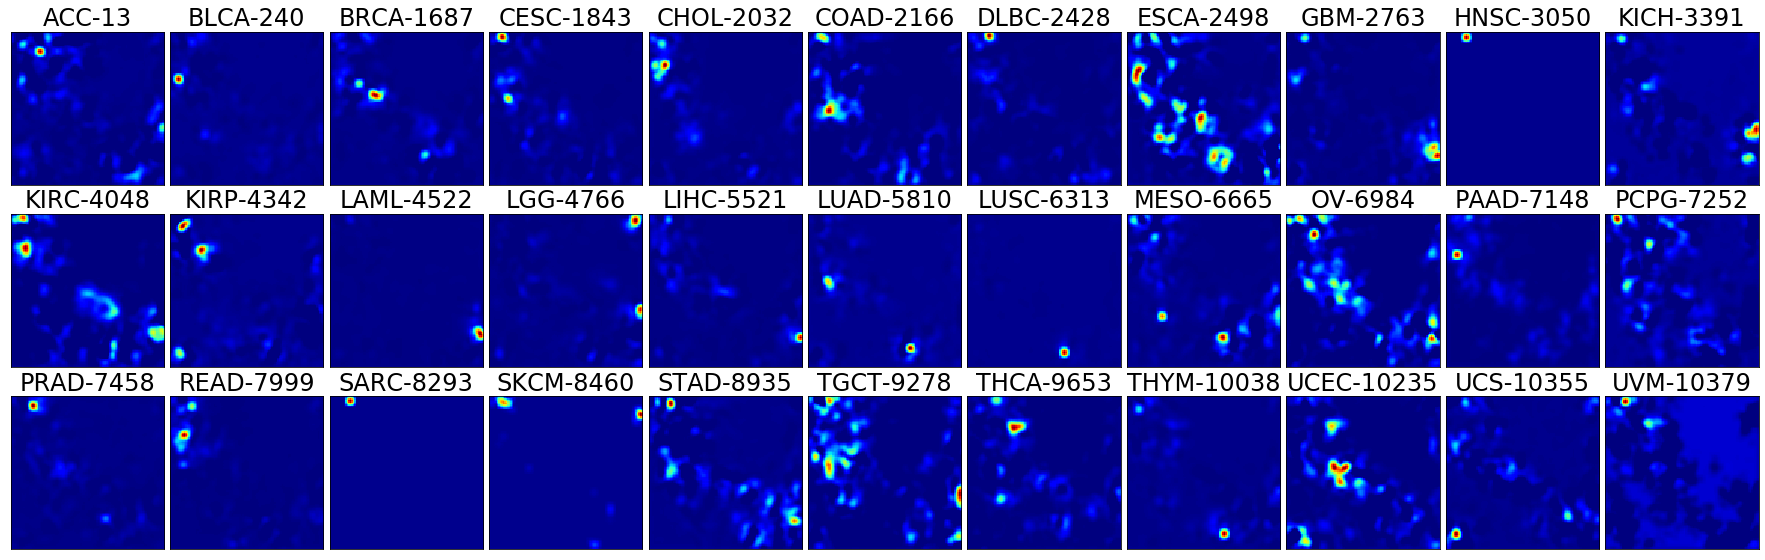

In [24]:
dfy = df[df.columns[-1:]]
label_idxs = dfy['class'].to_frame(name = 'labels').groupby('labels').apply(lambda x:x.index.to_list())

all_heatmap_values = []
seed = 256
image_names = [pd.Series(label_idxs[i]).sample(1, random_state = seed).to_list()[0] for i in range(len(label_idxs))]
dfy['idx'] = range(len(dfy))
idxes = dfy.loc[image_names]['idx'].to_list()
rows = dfy.loc[image_names]['class'].tolist()

fontsize = 24
fig, axes = plt.subplots(nrows=3, ncols=11, figsize=(25, 8), sharex = True, sharey = True)

for row, pid, ax, name in zip(rows, idxes, axes.ravel(), image_names):

    clas = row.split('_')[-1]
    pid_name = clas + '-' + str(pid)
    print(pid_name, pid, row)

    y = pd.DataFrame(Y, columns = range(Y.shape[-1]))
    dfY = y.iloc[[pid]]
    arrX = X[[pid]]
    dfimp = CalcFeatImpEach(model, mp, arrX, dfY, apply_logrithm = False, apply_smoothing = True, sigma = 2, kernel_size=7)
    IMPM = dfimp["imp"].values.reshape(mp._S.fmap_shape)
    ax.imshow(IMPM, cmap = 'jet', vmin = -0.1)    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(pid_name, fontdict = {'fontsize': fontsize})
    
    all_heatmap_values.append({'seed':seed, 'class':clas, 'idx':pid, 'name':name, 'h_value': IMPM})

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.04, hspace=0.04)

fig.savefig('./XAI-local-%s.png' % seed, bbox_inches='tight', dpi=400) 


# plot each class

In [19]:
{"BRCA":2, "CHOL":4, "READ":23, }  

{'CHOL': 4, 'READ': 23, 'KICH': 10}

03_BRCA
BRCA-506 506 03_BRCA
2021-04-13 14:46:53,259 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:46:53,465 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:06<00:00, 1730.40it/s]


BRCA-507 507 03_BRCA
2021-04-13 14:47:16,333 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:47:16,763 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1805.80it/s]


BRCA-508 508 03_BRCA
2021-04-13 14:47:39,014 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:47:39,405 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1880.45it/s]


BRCA-509 509 03_BRCA
2021-04-13 14:48:00,109 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:48:01,021 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1796.95it/s]


BRCA-510 510 03_BRCA
2021-04-13 14:48:22,928 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:48:23,106 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1863.03it/s]


BRCA-511 511 03_BRCA
2021-04-13 14:48:44,965 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:48:45,347 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1818.89it/s]


BRCA-512 512 03_BRCA
2021-04-13 14:49:06,706 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:49:07,121 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1847.05it/s]


BRCA-513 513 03_BRCA
2021-04-13 14:49:29,138 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:49:29,526 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1816.01it/s]


BRCA-514 514 03_BRCA
2021-04-13 14:49:50,768 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:49:51,176 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1833.93it/s]


11_KICH
KICH-3381 3381 11_KICH
2021-04-13 14:50:20,038 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:50:20,222 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1861.21it/s]


KICH-3382 3382 11_KICH
2021-04-13 14:50:41,230 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:50:41,410 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1972.16it/s]


KICH-3383 3383 11_KICH
2021-04-13 14:51:02,988 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:51:03,175 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1845.31it/s]


KICH-3384 3384 11_KICH
2021-04-13 14:51:25,372 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:51:25,559 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1823.53it/s]


KICH-3385 3385 11_KICH
2021-04-13 14:51:47,308 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:51:47,499 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1802.20it/s]


KICH-3386 3386 11_KICH
2021-04-13 14:52:09,155 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:52:09,335 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1793.44it/s]


KICH-3387 3387 11_KICH
2021-04-13 14:52:30,723 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:52:32,561 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1855.23it/s]


KICH-3388 3388 11_KICH
2021-04-13 14:52:54,699 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:52:54,888 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1865.77it/s]


KICH-3389 3389 11_KICH
2021-04-13 14:53:16,834 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:53:17,215 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1860.62it/s]


24_READ
READ-7969 7969 24_READ
2021-04-13 14:53:45,077 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:53:45,263 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1893.25it/s]


READ-7970 7970 24_READ
2021-04-13 14:54:06,896 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:54:07,075 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1875.40it/s]


READ-7971 7971 24_READ
2021-04-13 14:54:28,686 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:54:28,874 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1868.20it/s]


READ-7972 7972 24_READ
2021-04-13 14:54:50,763 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:54:50,947 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1816.68it/s]


READ-7973 7973 24_READ
2021-04-13 14:55:12,447 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:55:12,622 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1820.14it/s]


READ-7974 7974 24_READ
2021-04-13 14:55:34,799 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:55:34,972 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1873.84it/s]


READ-7975 7975 24_READ
2021-04-13 14:55:56,864 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:55:57,042 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1876.56it/s]


READ-7976 7976 24_READ
2021-04-13 14:56:19,309 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:56:19,497 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1847.83it/s]


READ-7977 7977 24_READ
2021-04-13 14:56:41,370 - INFO - [bidd-aggmap] - generate file: ./feature points_10381_correlation_umap_mp
2021-04-13 14:56:41,549 - INFO - [bidd-aggmap] - save html file to ./feature points_10381_correlation_umap_mp


100%|##########| 10404/10404 [00:05<00:00, 1858.40it/s]


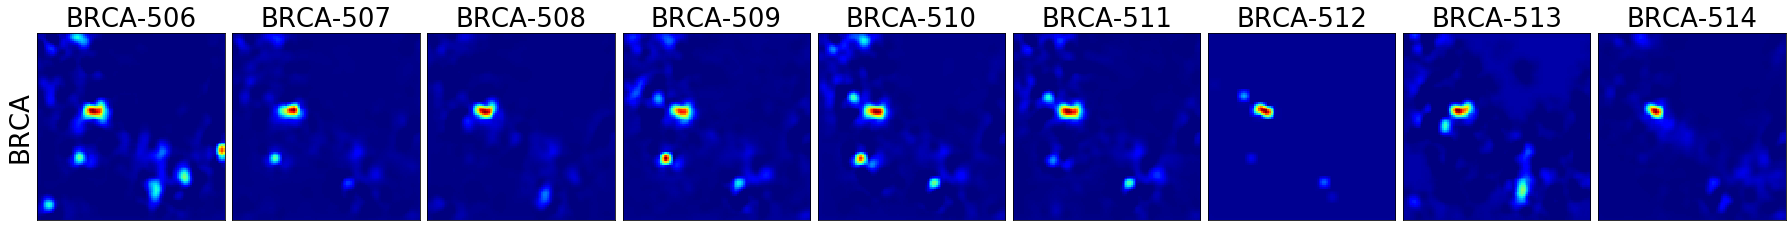

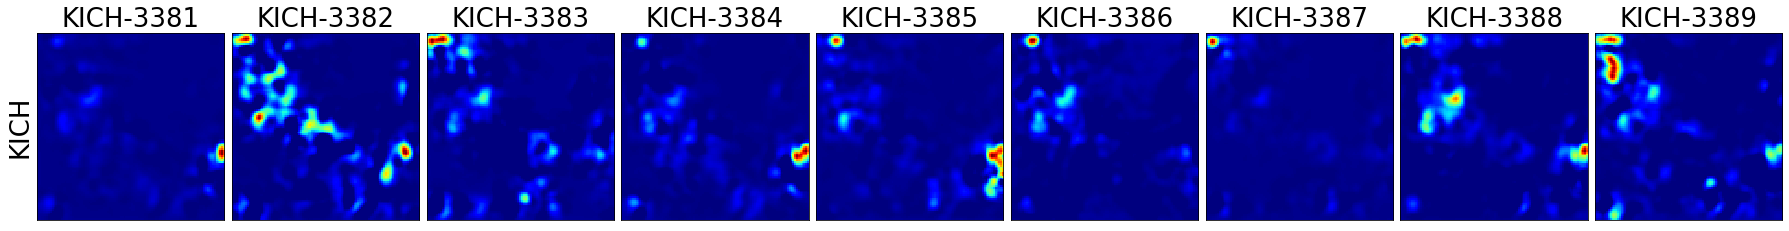

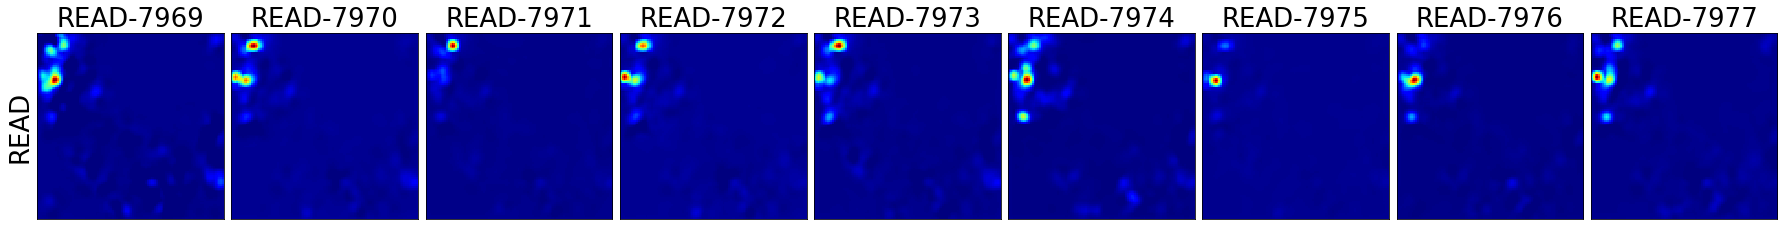

In [22]:
for select_class_idx in [2, 10, 23]:
    
    #select_class_idx = 4 #determinated which class

    n = 9 #how many individual samples

    seed = 0
    dfy = df[df.columns[-1:]]
    label_idxs = dfy['class'].to_frame(name = 'labels').groupby('labels').apply(lambda x:x.index.to_list())

    image_names = label_idxs.iloc[select_class_idx][:n]
    select_class= label_idxs.index[select_class_idx]
    print(select_class)


    dfy['idx'] = range(len(dfy))
    idxes = dfy.loc[image_names]['idx'].to_list()
    rows = dfy.loc[image_names]['class'].tolist()


    fontsize = 26
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=(25, 5), sharex = True, sharey = True)

    all_heatmap_values = []
    for row, pid, ax, name in zip(rows, idxes, axes.ravel(), image_names):

        clas = row.split('_')[-1]
        pid_name = clas + '-' + str(pid)
        print(pid_name, pid, row)

        y = pd.DataFrame(Y, columns = range(Y.shape[-1]))
        dfY = y.iloc[[pid]]
        arrX = X[[pid]]
        dfimp = CalcFeatImpEach(model, mp, arrX, dfY, apply_logrithm = False, apply_smoothing = True, sigma = 2, kernel_size=7)
        IMPM = dfimp["imp"].values.reshape(mp._S.fmap_shape)
        ax.imshow(IMPM, cmap = 'jet', vmin = -0.1)    
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(pid_name, fontdict = {'fontsize': fontsize})

        all_heatmap_values.append({'seed':seed, 'class':clas, 'idx':pid, 'name':name, 'h_value': IMPM})

    axes[0].set_ylabel(clas, fontsize = fontsize) 

    fig.tight_layout()

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.04, hspace=0.04)

    fig.savefig('./%s-local-%s.png' % (clas, pid), bbox_inches='tight', dpi=400) 
